In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm

local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 520 ms, sys: 57.9 ms, total: 578 ms
Wall time: 77.1 ms


(1100, 1)

Inferring:   0%|                                                                                 | 0/10 [00:00<?, ?it/s]

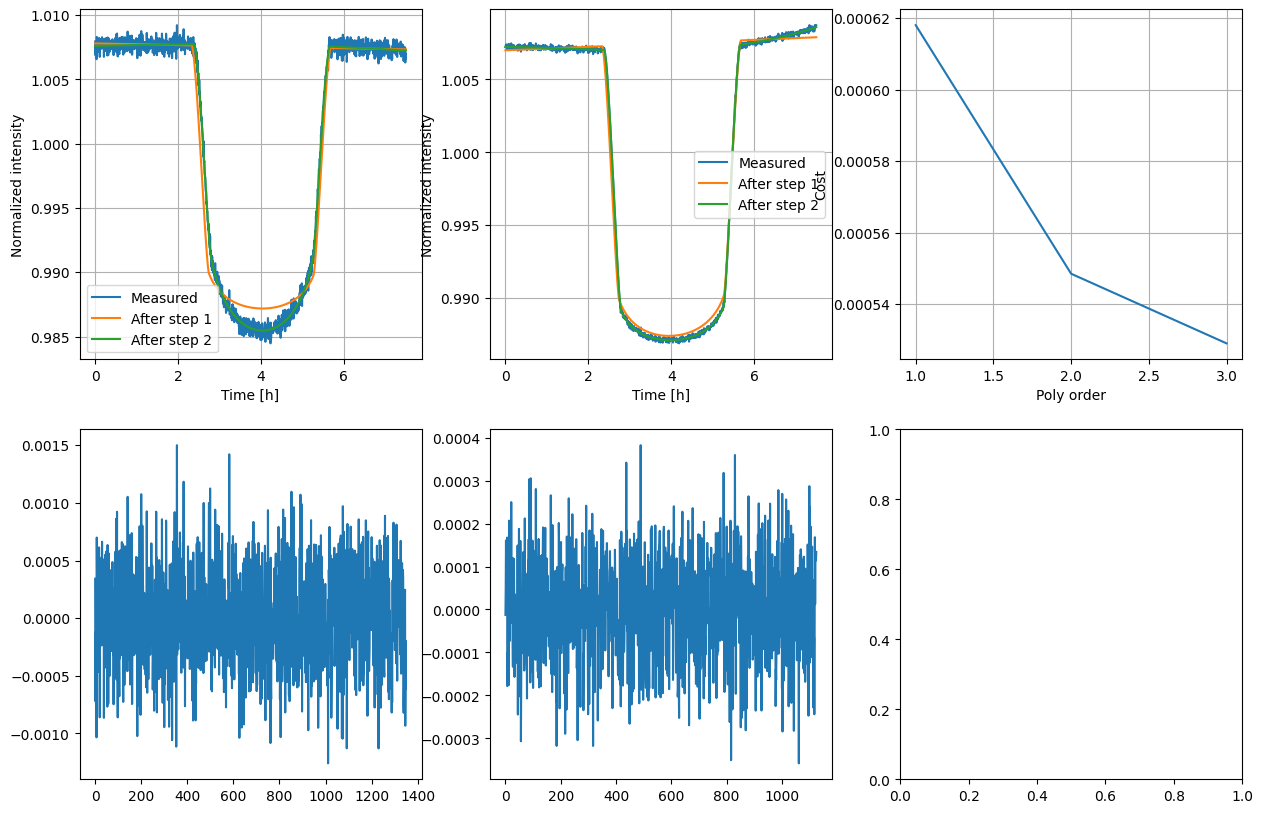

6.0401161222539664e-15 3.292924134889559e-10
6.0401161222539664e-15 3.292924134889559e-10
6.0226946643200185e-15 3.2928836766084943e-10
6.0226946643200185e-15 3.2928836766084943e-10
6.020205714089507e-15 3.292898353557919e-10
6.020205714089507e-15 3.292898353557919e-10
6.021778609294937e-15 3.292916062612638e-10
6.021778609294937e-15 3.292916062612638e-10
6.026927620576514e-15 3.2929309618876875e-10
6.026927620576514e-15 3.2929309618876875e-10
6.027068571336866e-15 3.2929240786966813e-10
6.027068571336866e-15 3.2929240786966813e-10
6.024076738773908e-15 3.292915906323851e-10
6.024076738773908e-15 3.292915906323851e-10
6.02551676108407e-15 3.292920184233047e-10
6.02551676108407e-15 3.292920184233047e-10


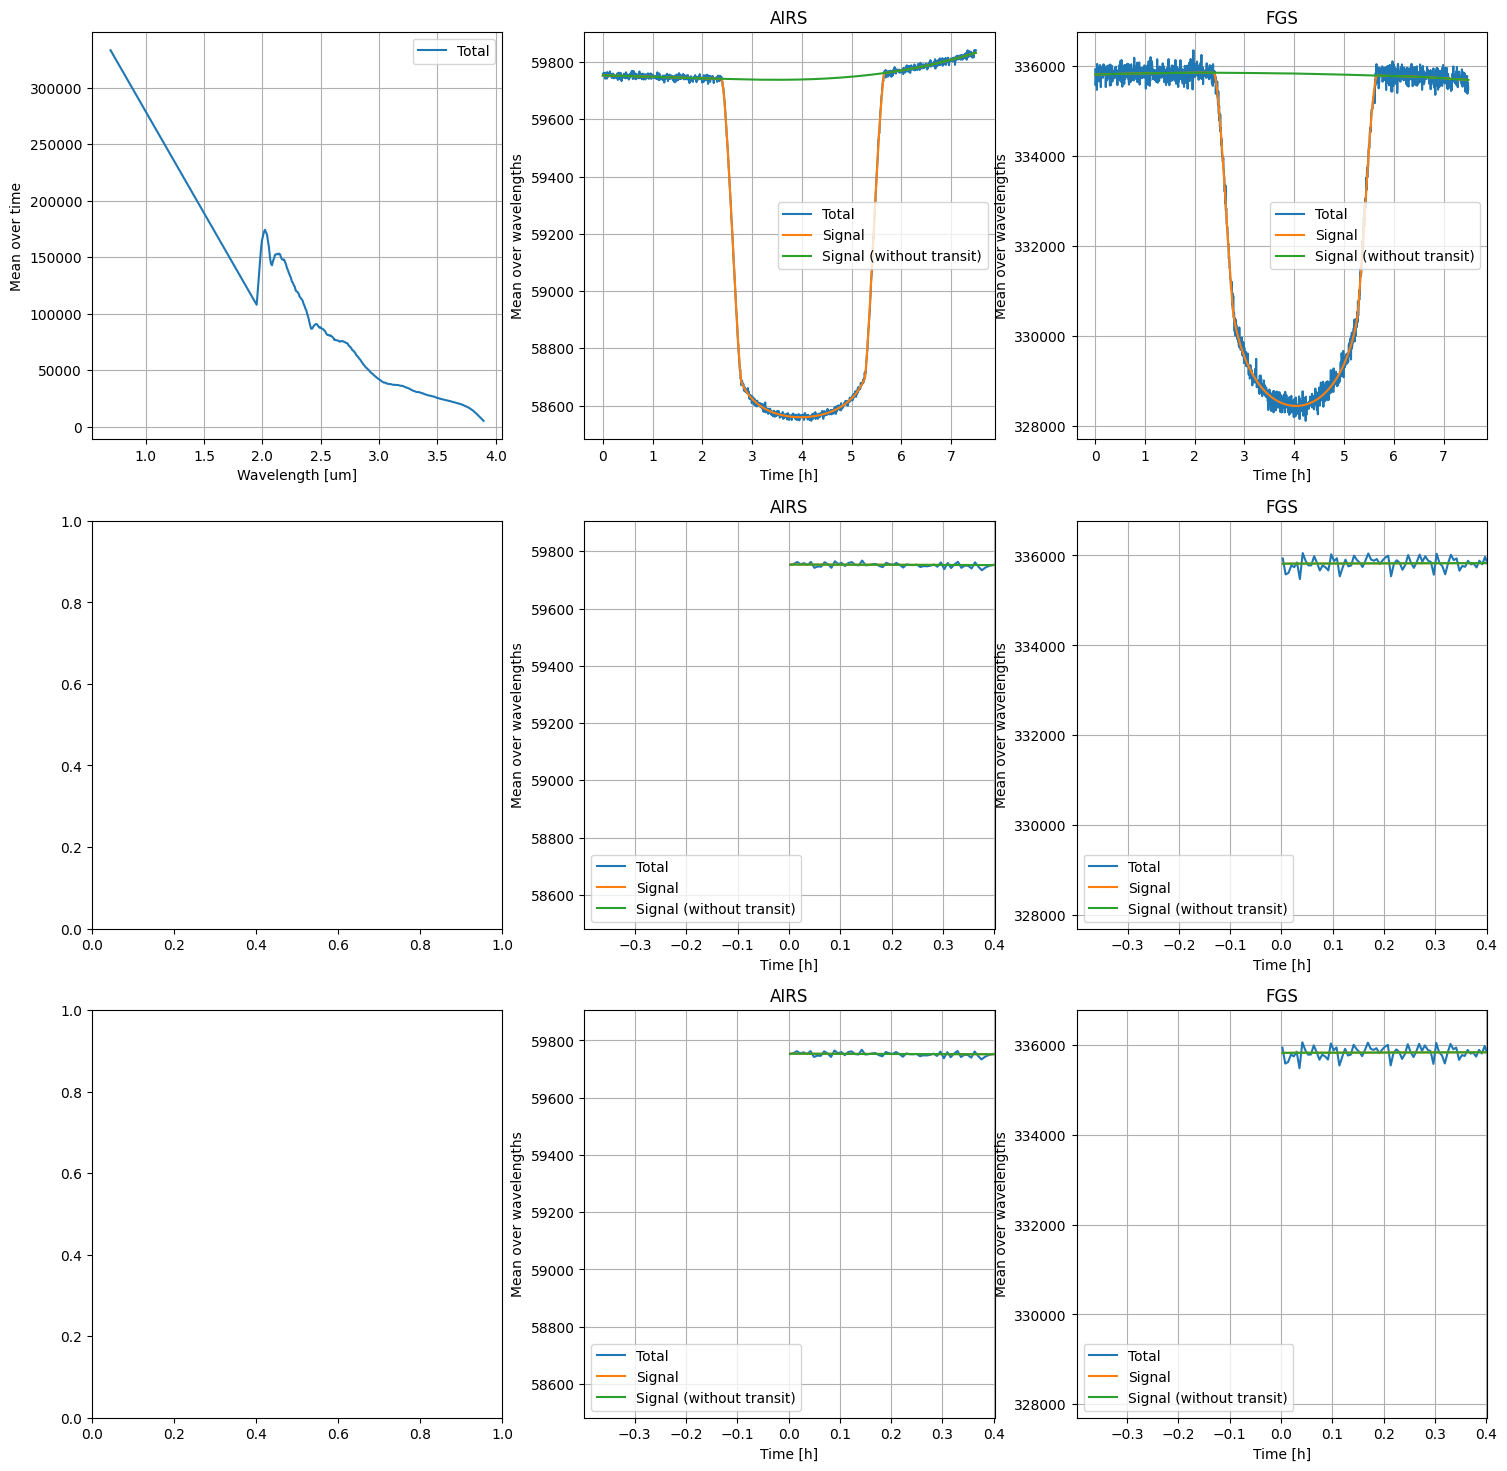

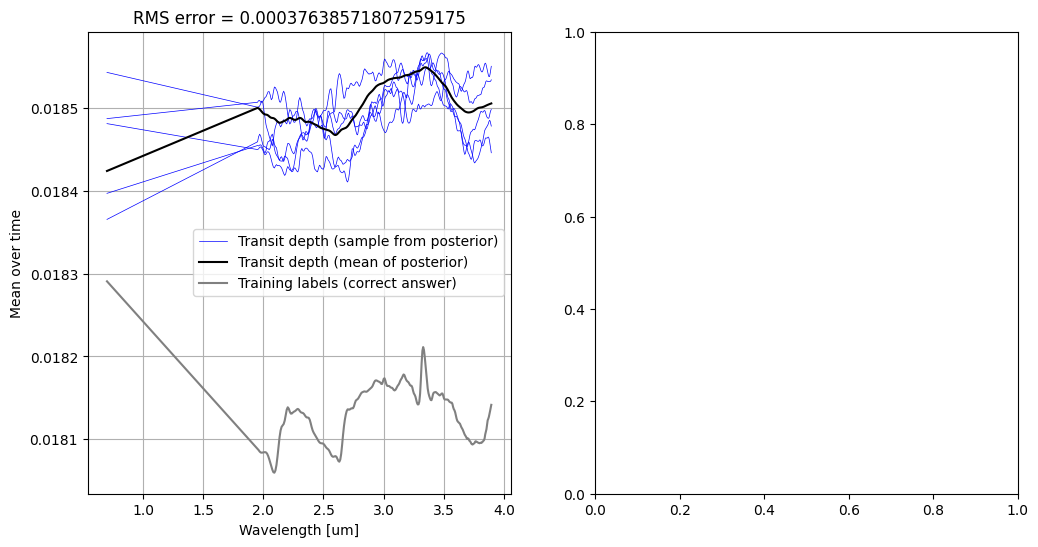

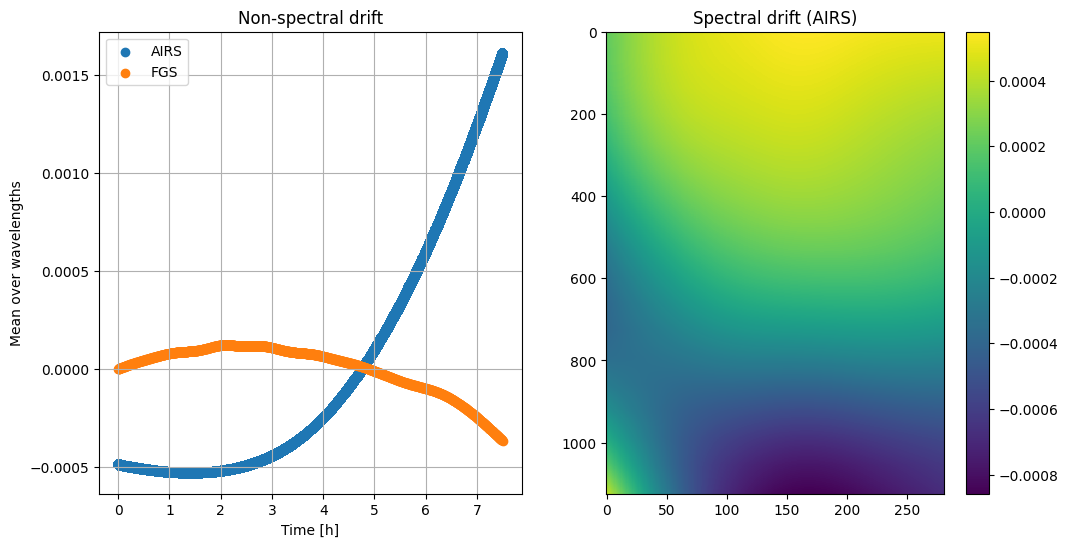

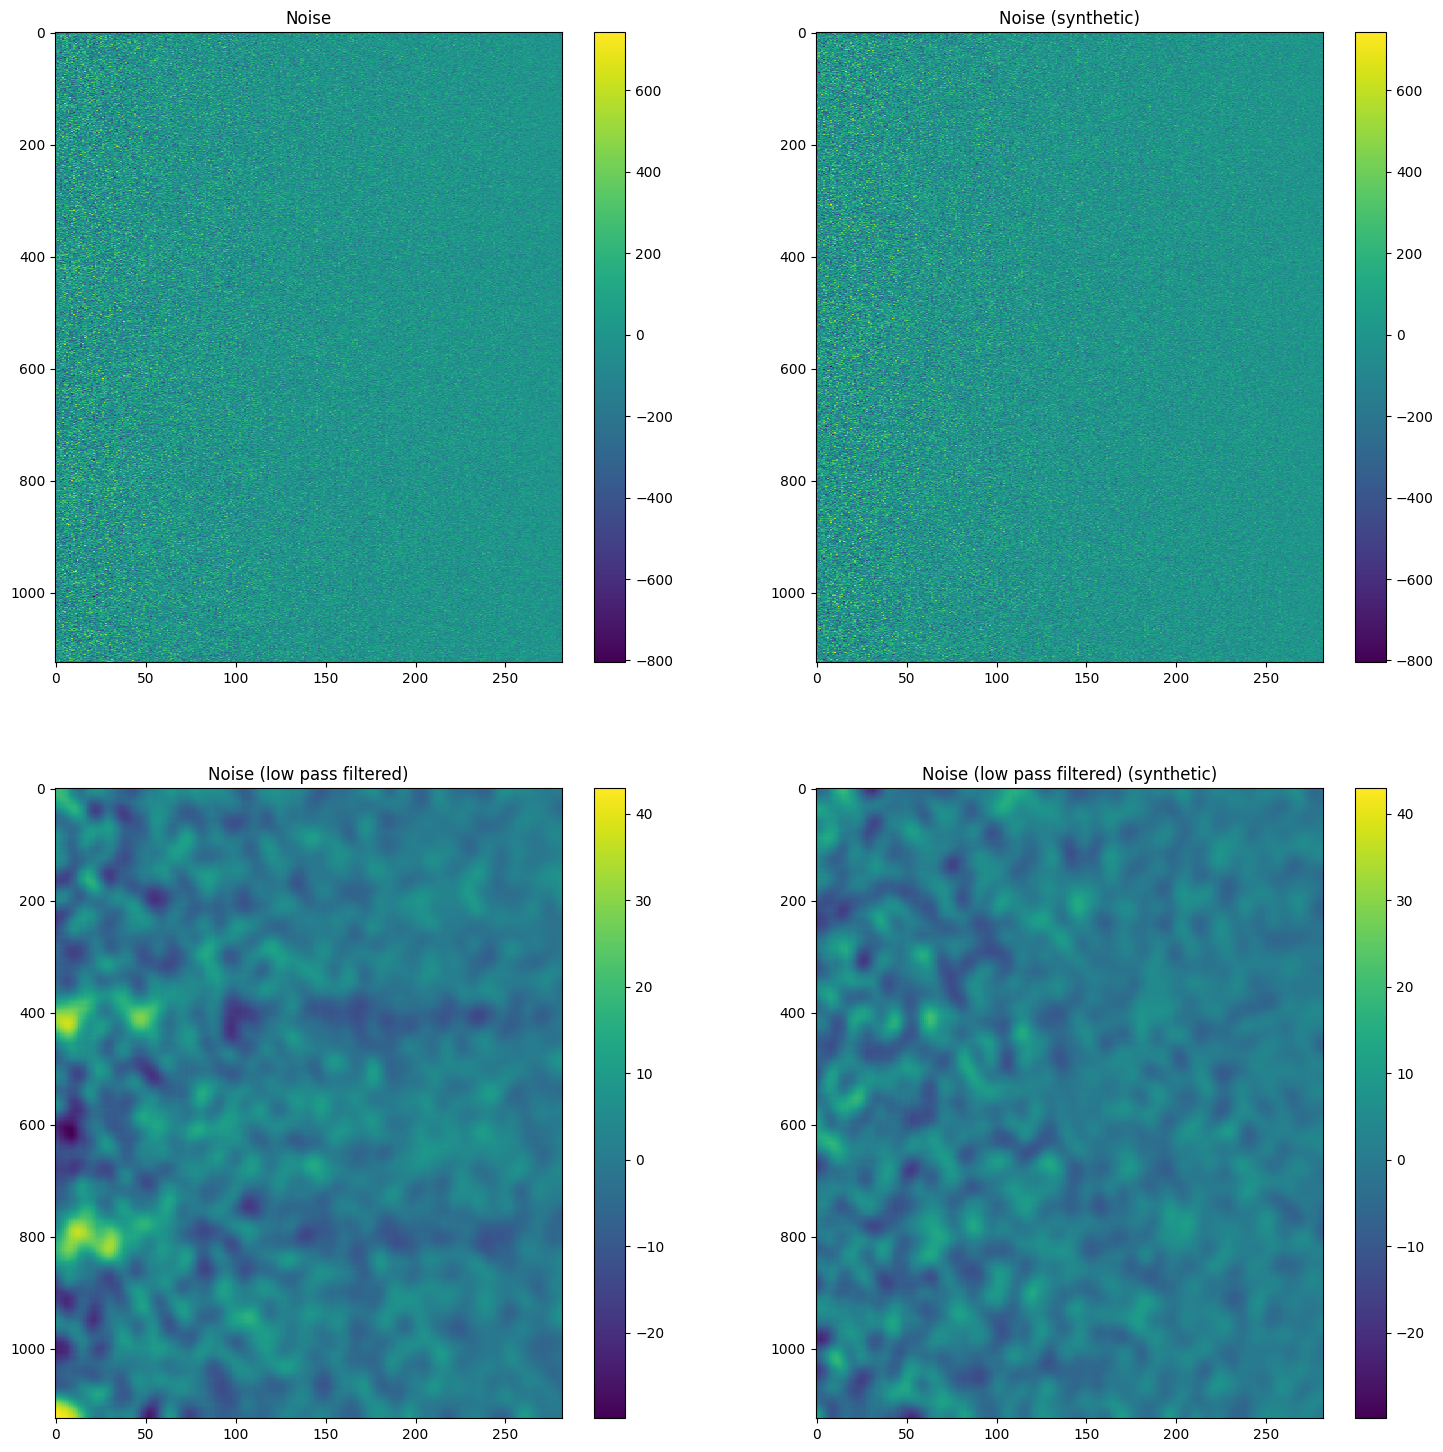

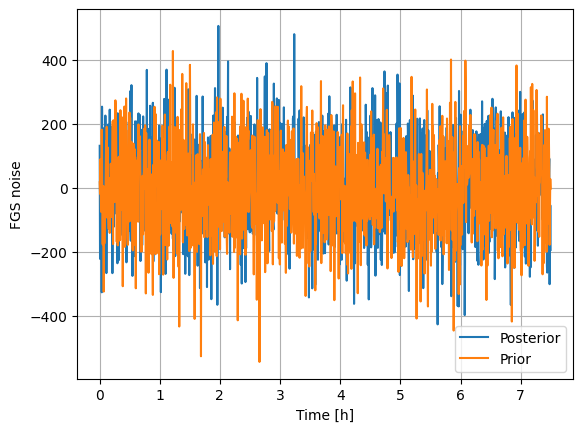

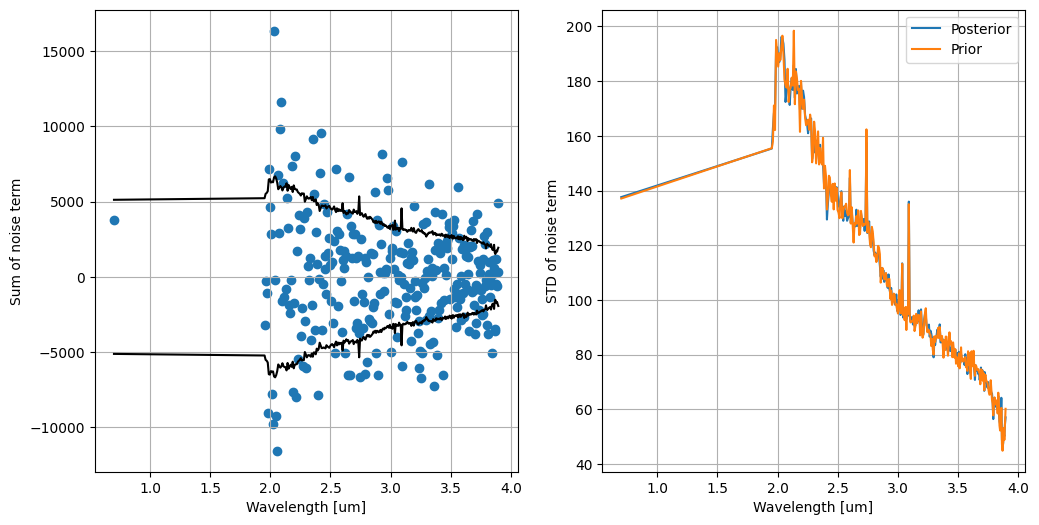

Inferring:  10%|███████▎                                                                 | 1/10 [00:48<07:16, 48.50s/it]

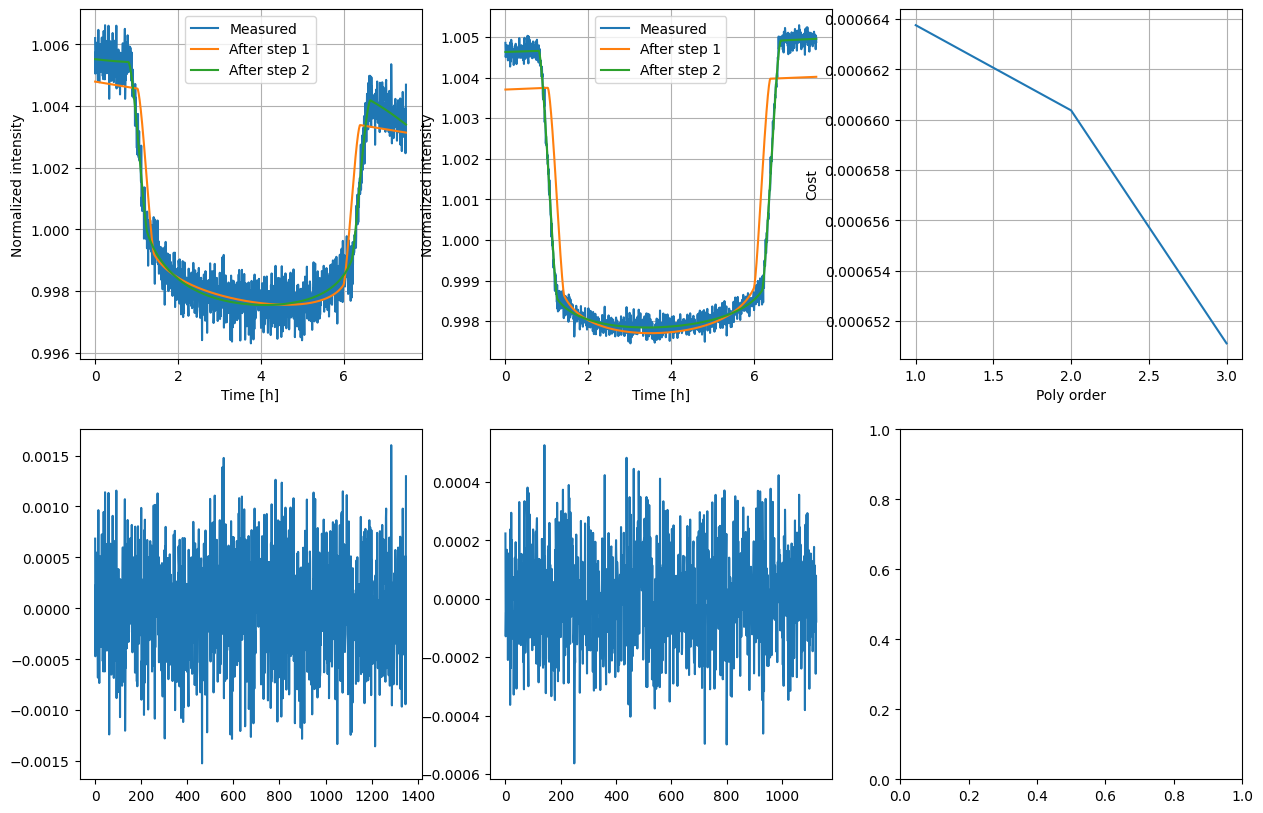

1.4173404703880555e-14 4.545667755105328e-10
1.4173404703880555e-14 4.545667755105328e-10
1.436567665970281e-14 4.5455263046248757e-10
1.436567665970281e-14 4.5455263046248757e-10
1.4245070158847885e-14 4.5456079622107157e-10
1.4245070158847885e-14 4.5456079622107157e-10
1.4212977269951512e-14 4.545655219015123e-10
1.4212977269951512e-14 4.545655219015123e-10
1.421641243596587e-14 4.545679402178342e-10
1.421641243596587e-14 4.545679402178342e-10
1.4221538359353297e-14 4.545689893266789e-10
1.4221538359353297e-14 4.545689893266789e-10
1.4221286304938115e-14 4.545694045042597e-10
1.4221286304938115e-14 4.545694045042597e-10
1.422959881570652e-14 4.545695611383798e-10
1.422959881570652e-14 4.545695611383798e-10


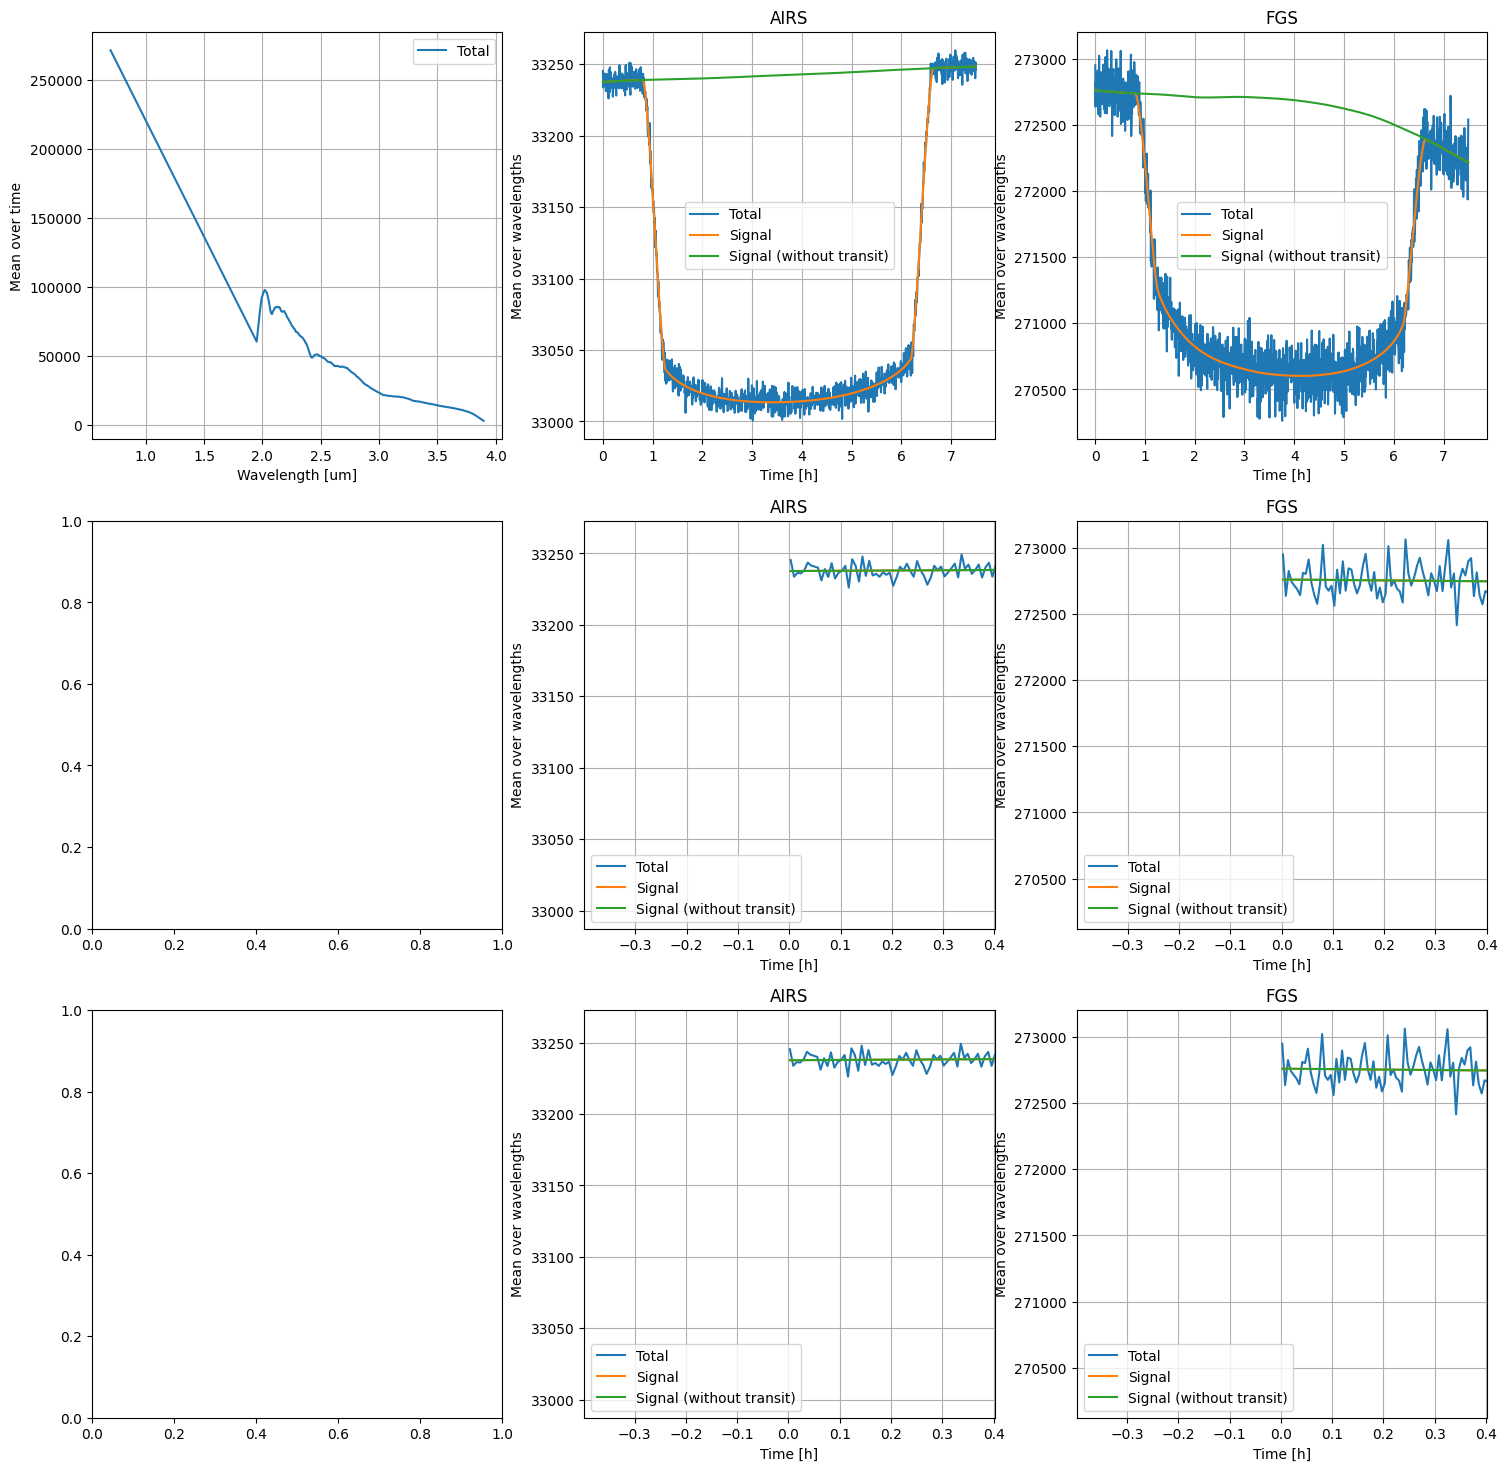

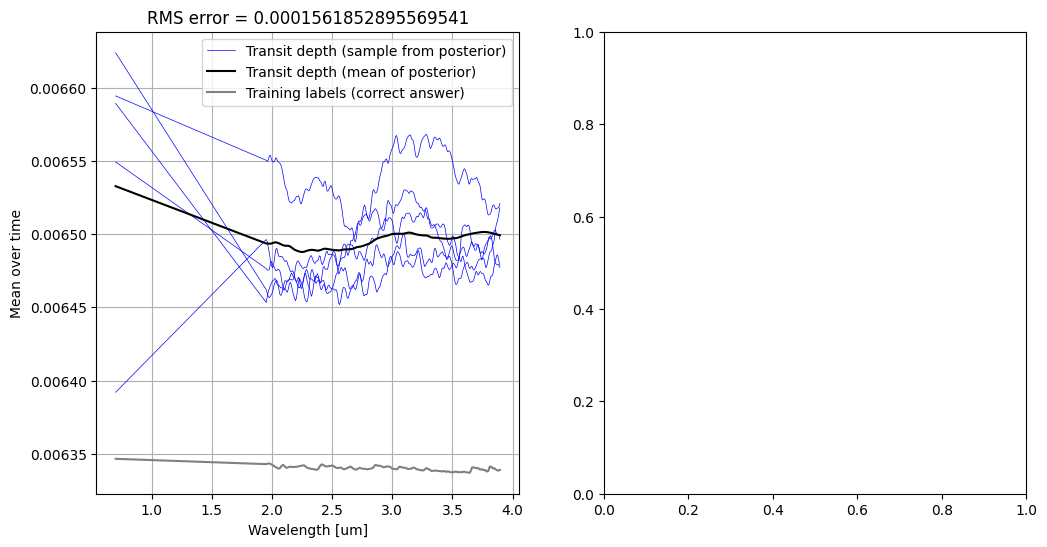

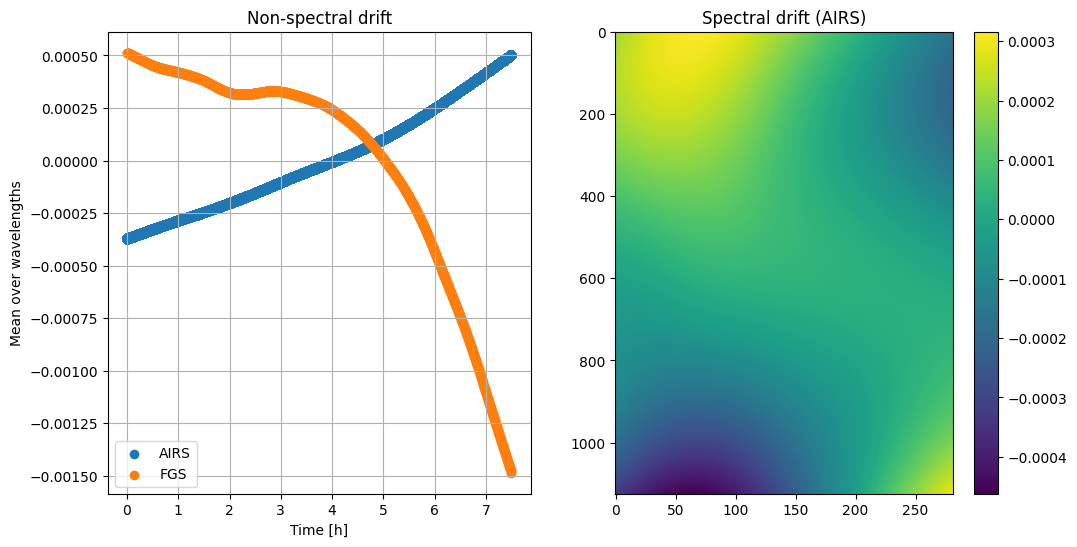

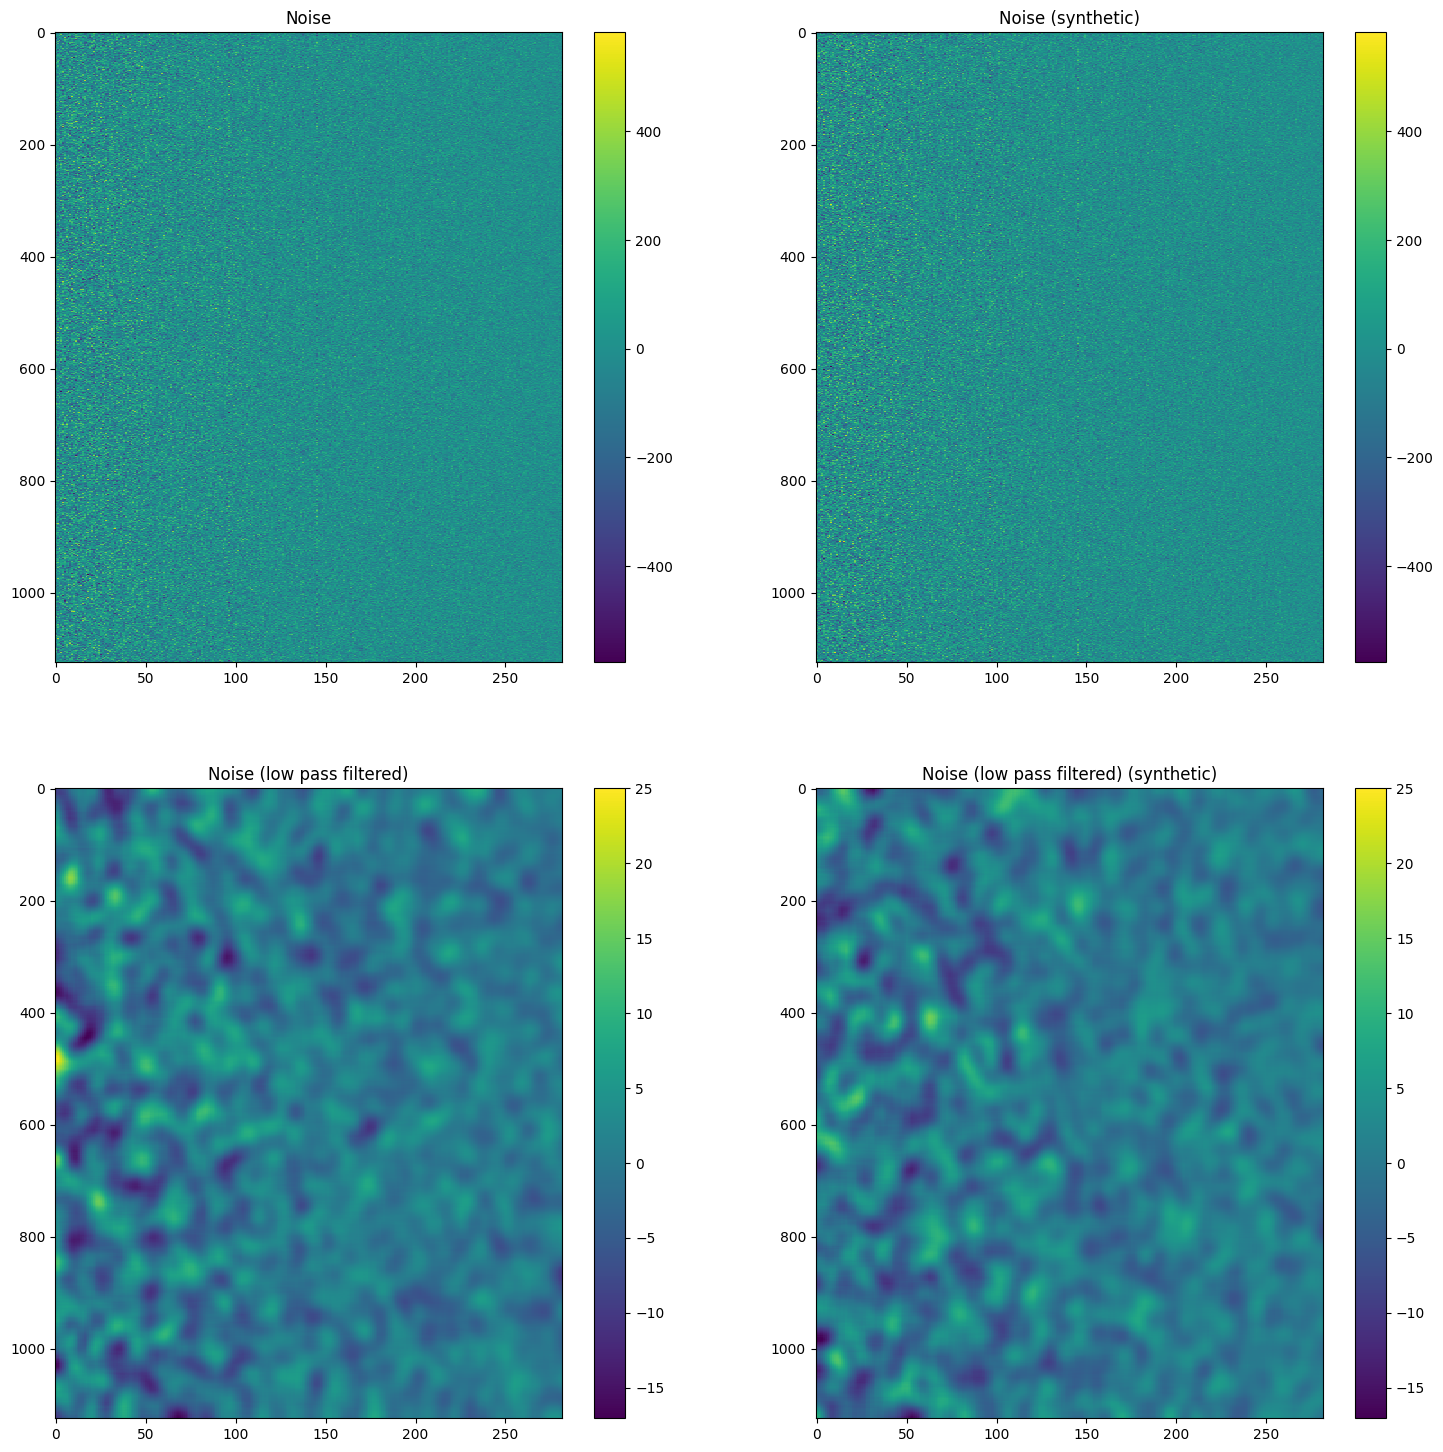

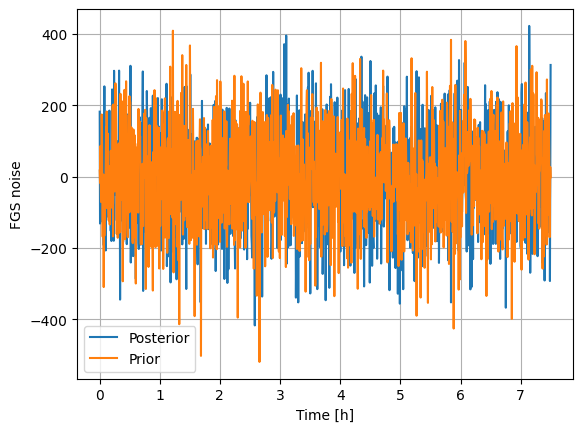

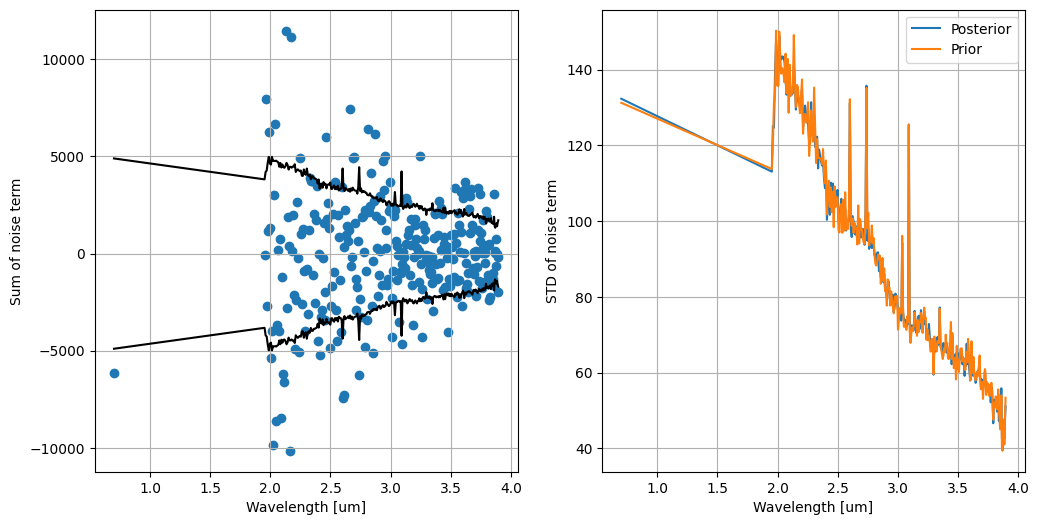

Inferring:  20%|██████████████▌                                                          | 2/10 [01:38<06:34, 49.32s/it]

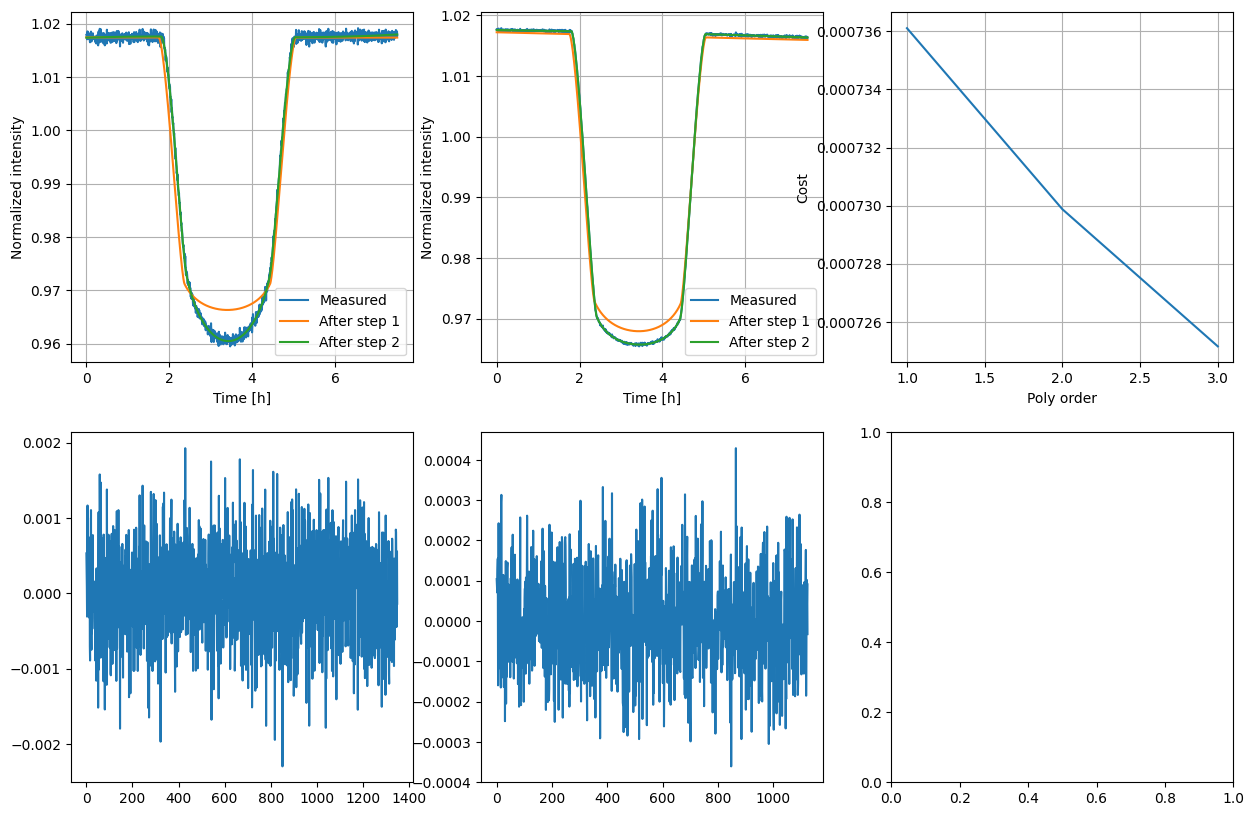

7.680108747478492e-15 3.07804438107049e-10
7.680108747478492e-15 3.07804438107049e-10
3.877043404928399e-15 3.078142542769322e-10
3.877043404928399e-15 3.078142542769322e-10
3.750444778128384e-15 3.0781684556688924e-10
3.750444778128384e-15 3.0781684556688924e-10
3.739133409187104e-15 3.0781823158672014e-10
3.739133409187104e-15 3.0781823158672014e-10
3.878475351890168e-15 3.07817658393351e-10
3.878475351890168e-15 3.07817658393351e-10


In [ ]:
%%time
import gp
import ariel_gp
kgs.profiling=False
kgs.debugging_mode=2
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.n_iter = 7
model.starter_model.do_plots = True
model.plot_final = True
model.train(train_data)
model.starter_model.loaders[0].cache_steps = [5]
model.loaders[0].cache_steps = []
data = train_data[:10]
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
inferred_data_simple = model.starter_model.infer(data)
kgs.score_metric(inferred_data_simple, data)

In [ ]:
%debug

In [ ]:
import scipy as sp
sp.sparse.block_diag?